In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [18]:
data_input = "../data/2022/input/stacking_predictions/out/k3/test"
model = "igcngru_features"
day = "20221021"

In [19]:
probs_cols = [
    "censys",
    "driftnet",
    "internetcensus",
    "intrinsec",
    "ipip",
    "mirai",
    "onyphe",
    "rapid7",
    "securitytrails",
    "shadowserver",
    "shodan",
    "u_mich",
    "unk_bruteforcer",
    "unk_exploiter",
    "unk_spammer",
    "unknown",
]

probs_cols.sort()

In [20]:
preds, labels = [], []
for fold in np.arange(10):
    df = pd.read_csv(f"{data_input}/{model}_{day}_fold0{fold}.csv")
    df[~df.y_true.isin(["unknown"])]
    preds.append(
        df[probs_cols].values.argmax(axis=1)
    )
    labels.append(
        df.y_true
    )
    

In [21]:
preds = np.hstack(preds)
labels = np.hstack(labels).tolist()
preds = [ probs_cols[i] for i in preds ]

In [22]:
f1_score(labels, preds, average="macro", labels=labels)

0.9498416511367436

Text(0.5, 1.0, 'Model: igcngru_features / Day: 20221021')

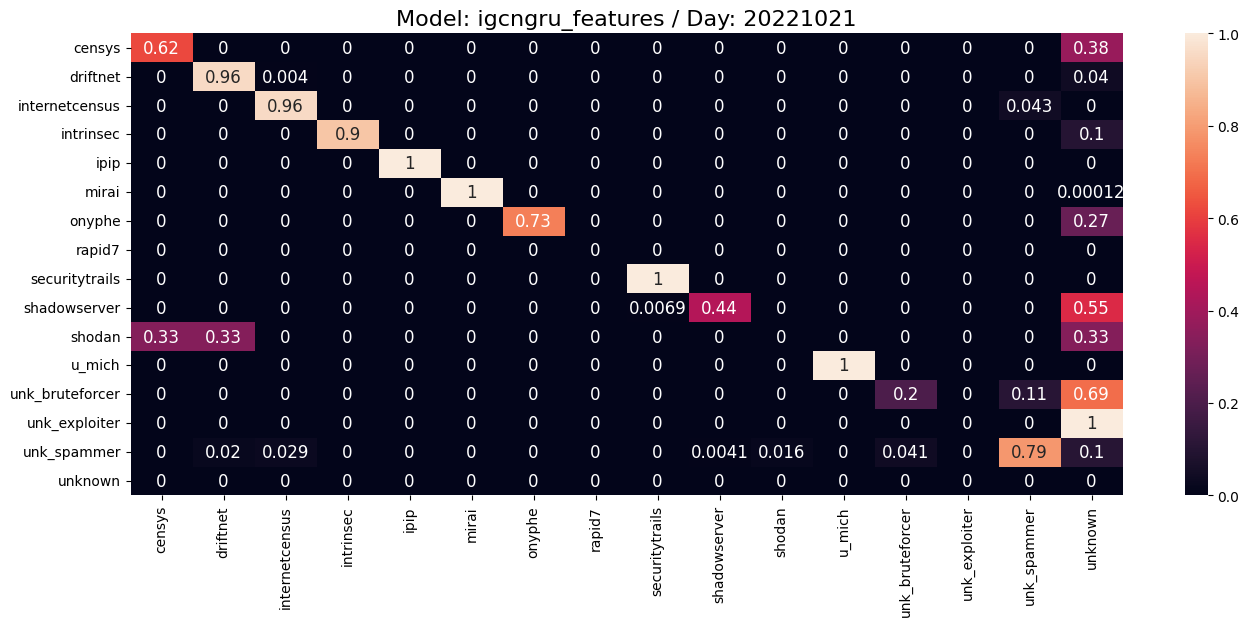

In [23]:
cm = confusion_matrix(labels, preds, labels=probs_cols, normalize="true")
plt.figure(figsize=(16, 6))
sns.heatmap(
    cm,
    annot=True,
    annot_kws={"size": 12},
    xticklabels=probs_cols,
    yticklabels=probs_cols,
    square=False,
)
plt.title(f"Model: {model} / Day: {day}", fontsize=16)

In [24]:
df.head()

,Unnamed: 0,src_ip,censys,driftnet,internetcensus,intrinsec,ipip,mirai,onyphe,rapid7,securitytrails,shadowserver,shodan,u_mich,unk_bruteforcer,unk_exploiter,unk_spammer,unknown,y_true
0,12,167.94.138.102,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,censys
1,15,167.94.138.146,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,censys
2,87,118.40.8.149,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,mirai
3,91,103.126.245.10,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,mirai
4,93,193.142.146.35,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,unk_bruteforcer
